# Membaca Dataset

In [1]:
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore")

#for preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, RobustScaler
import joblib

#For model
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# for checking testing results
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv("CVD_cleaned.csv")
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,Yes,No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [3]:
df.shape

(308854, 19)

# Visualisasi Data

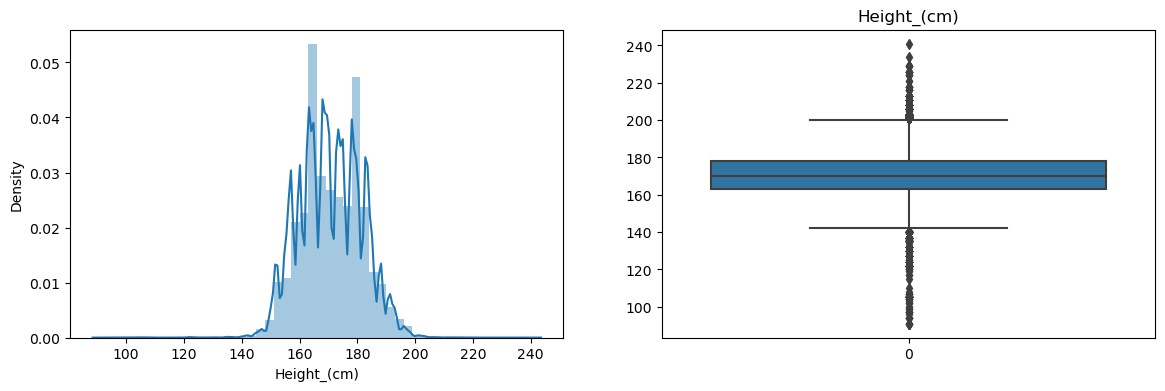

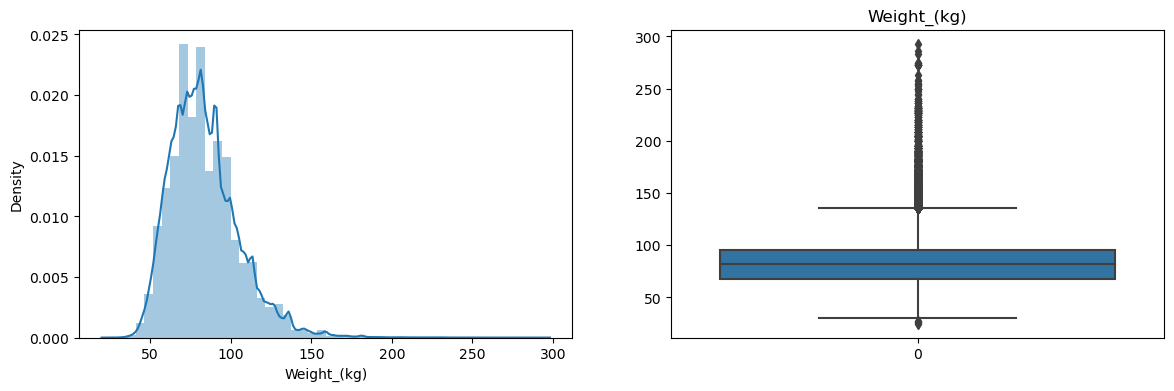

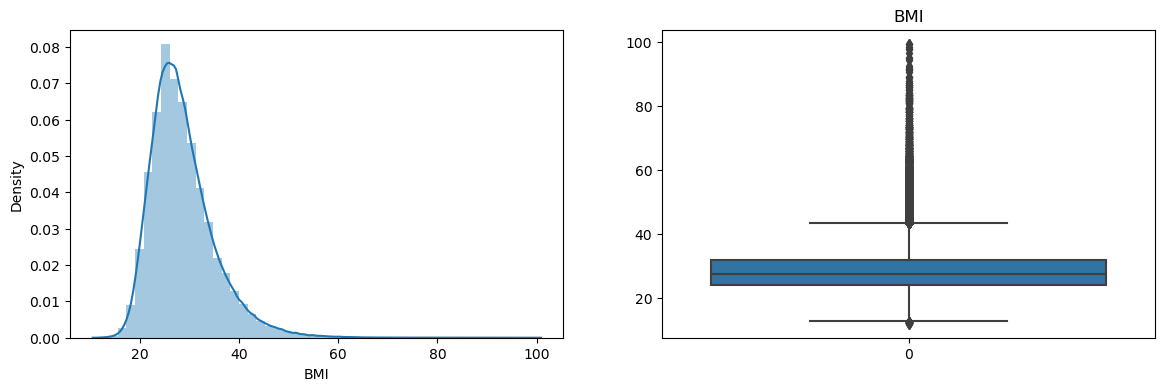

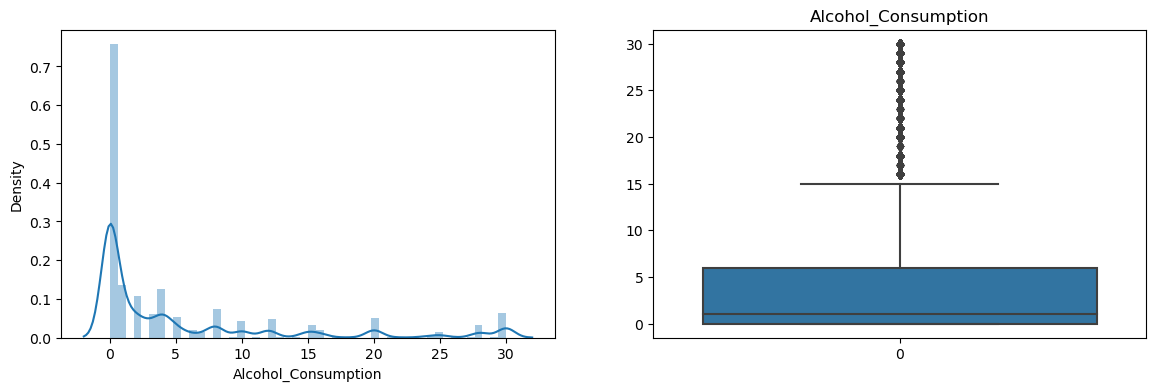

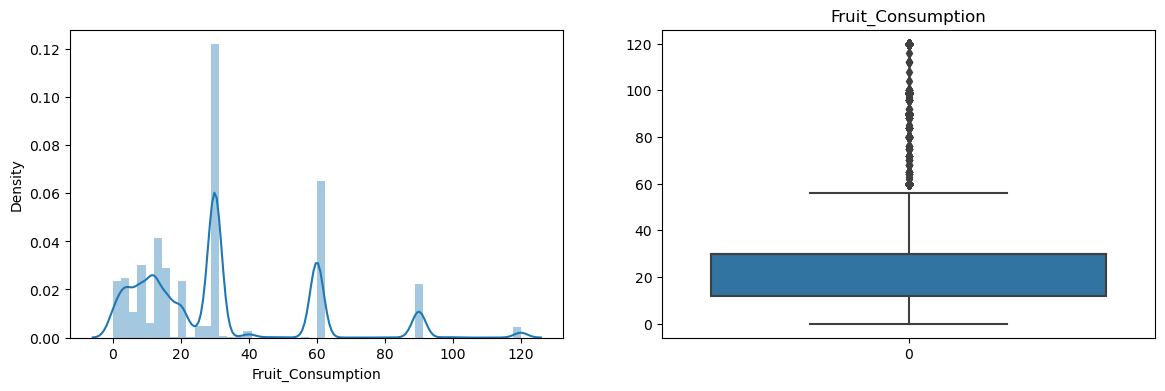

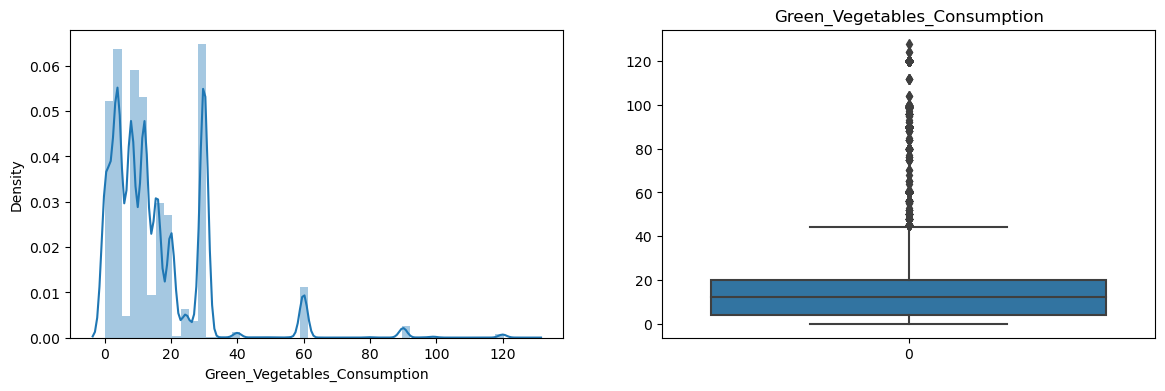

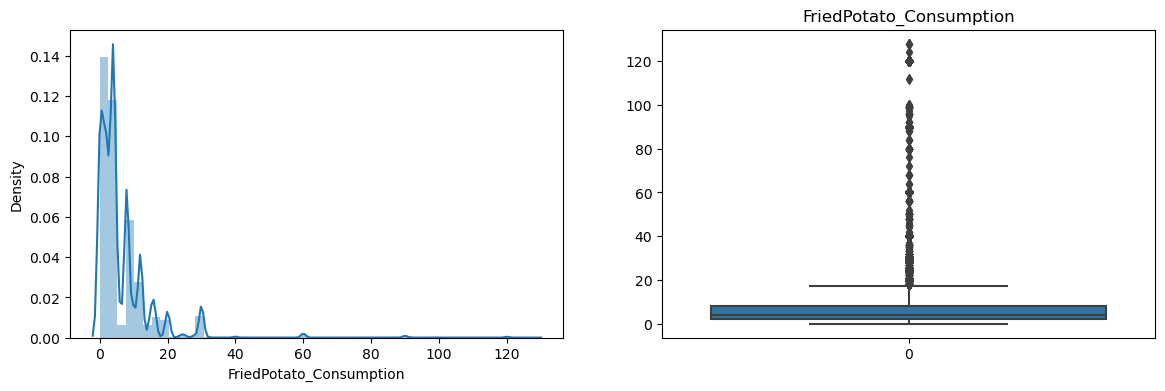

In [4]:
# Checking the skewness of numeric data
numeric = ['Height_(cm)','Weight_(kg)','BMI','Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption']

for col in numeric:
    plt.figure(figsize = (14,4))
    plt.title(f'{col}')
    plt.subplot(1,2,1)
    sns.distplot(df[col])

    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.title(f'{col}')

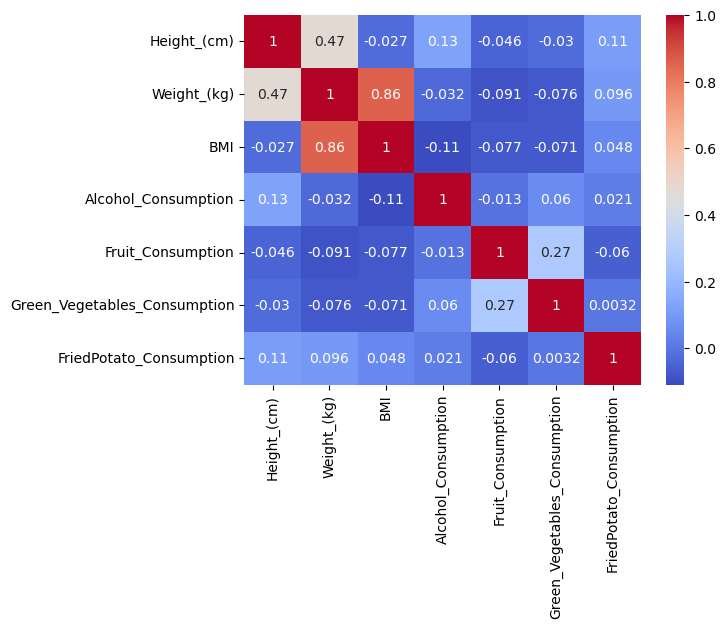

In [5]:
# Correlation matrix among numerical variables
correlation_matrix = df[['Height_(cm)','Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

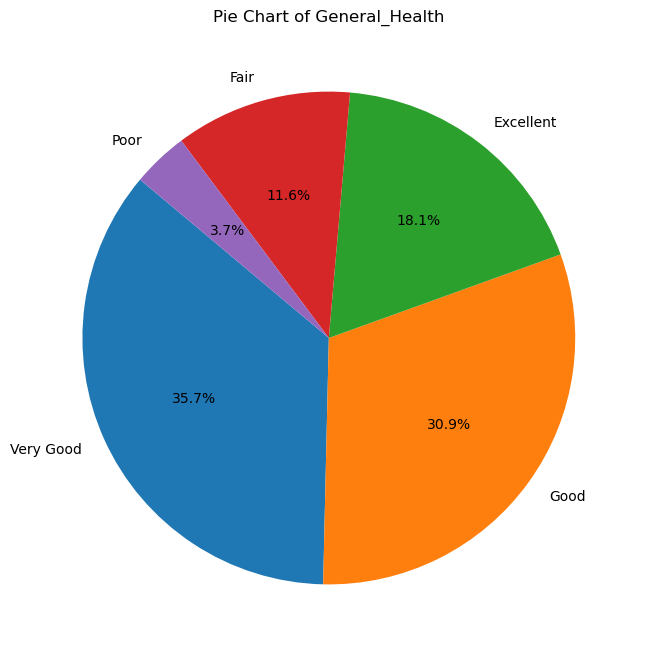

In [6]:
target_variable = 'General_Health'

# Hitung jumlah masing-masing kategori
category_counts = df[target_variable].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {target_variable}')
plt.show()

In [7]:
df['General_Health'].value_counts()

Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: General_Health, dtype: int64

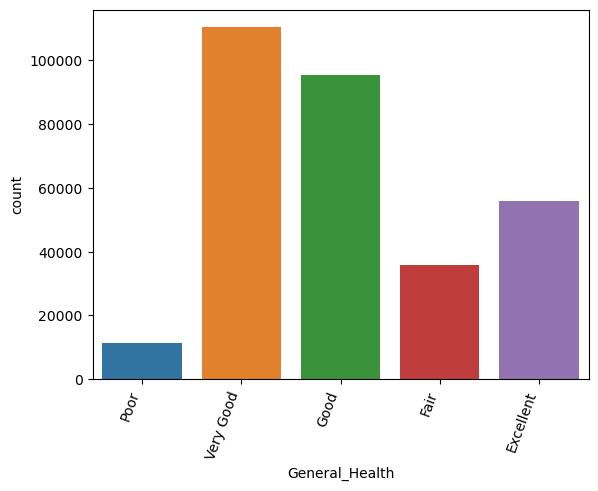

In [8]:
sns.countplot(x = df.General_Health)
plt.xticks(rotation=70, ha='right')
plt.show()

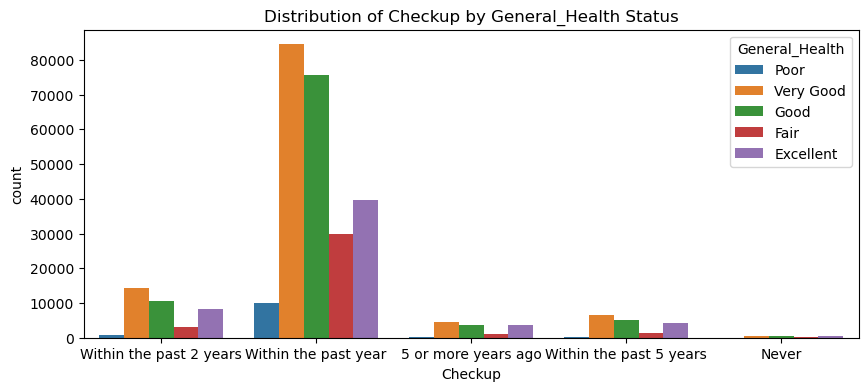

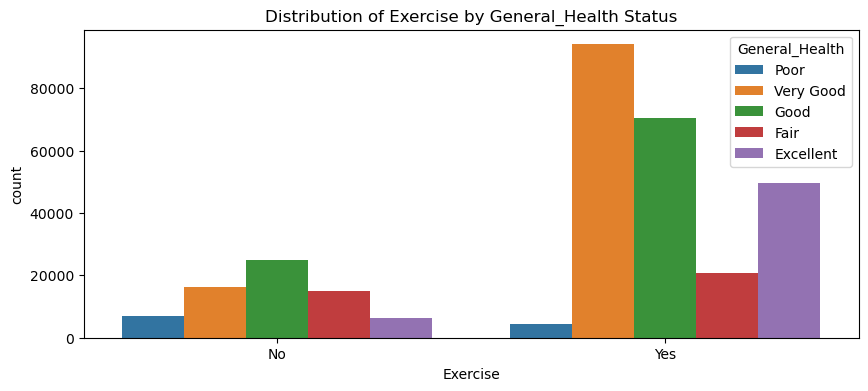

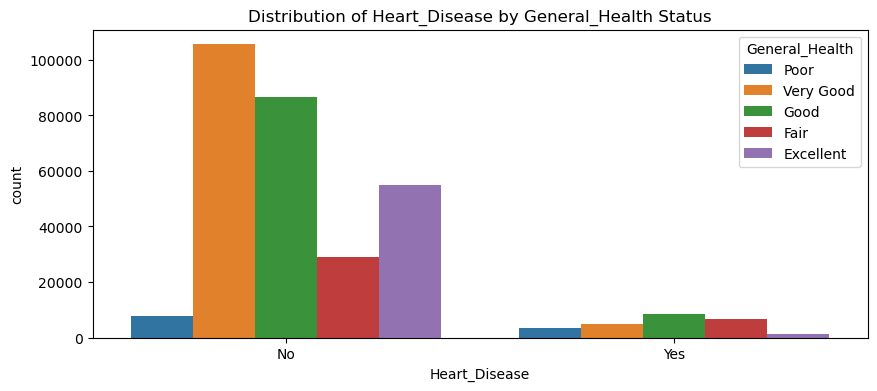

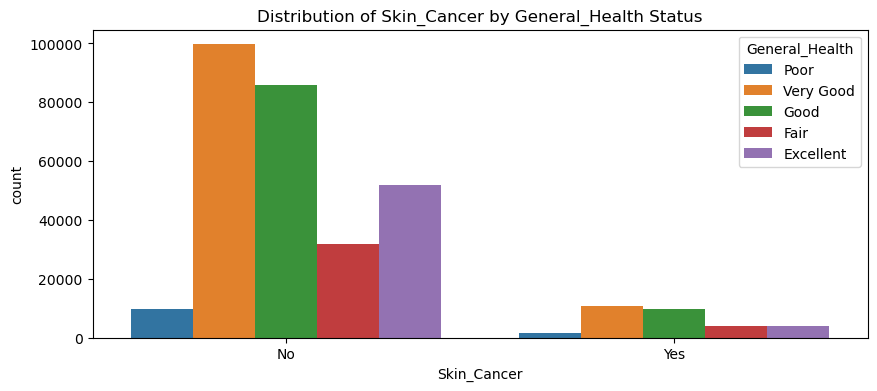

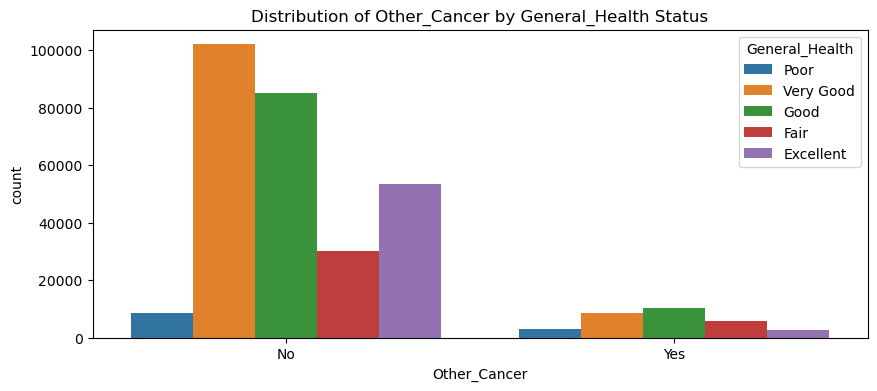

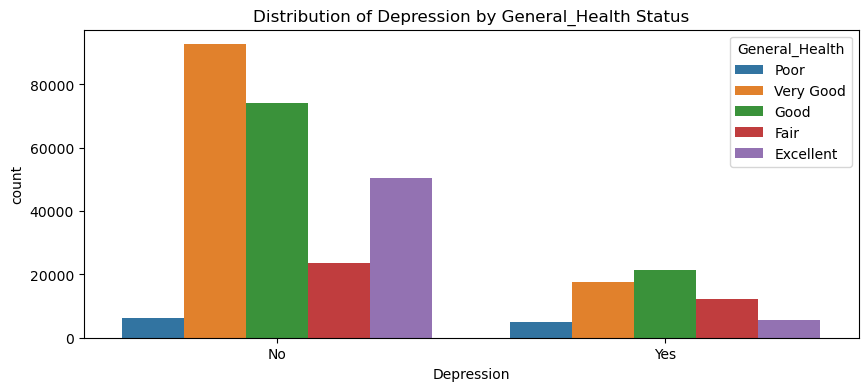

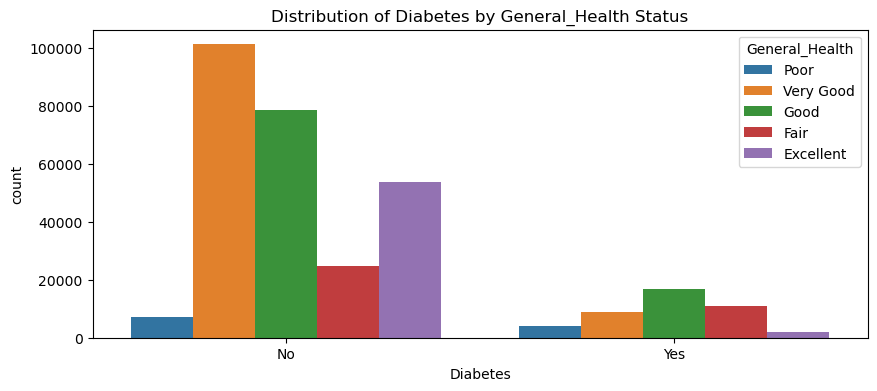

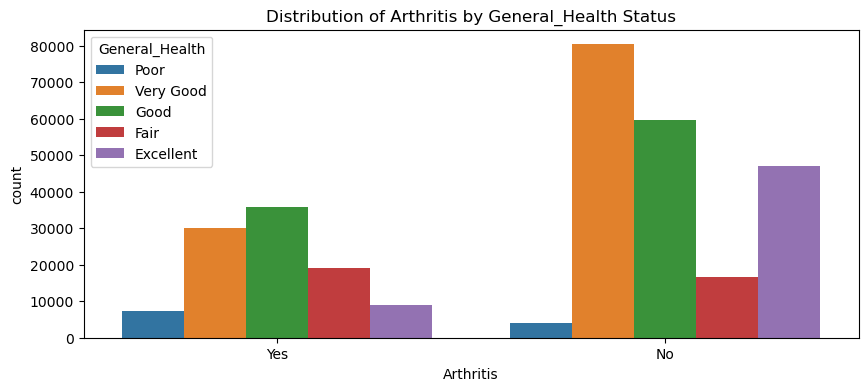

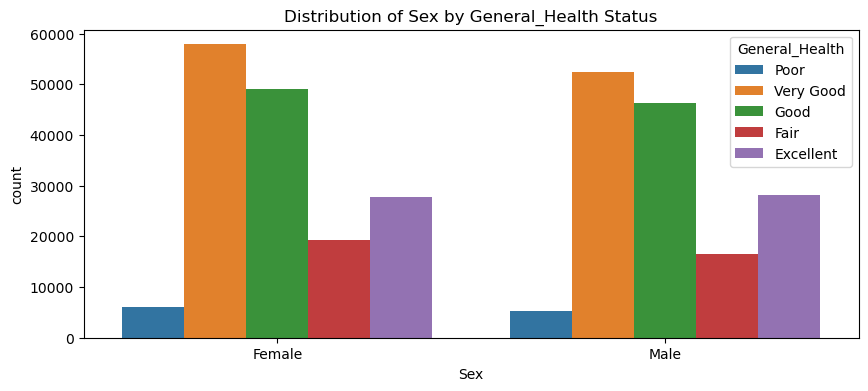

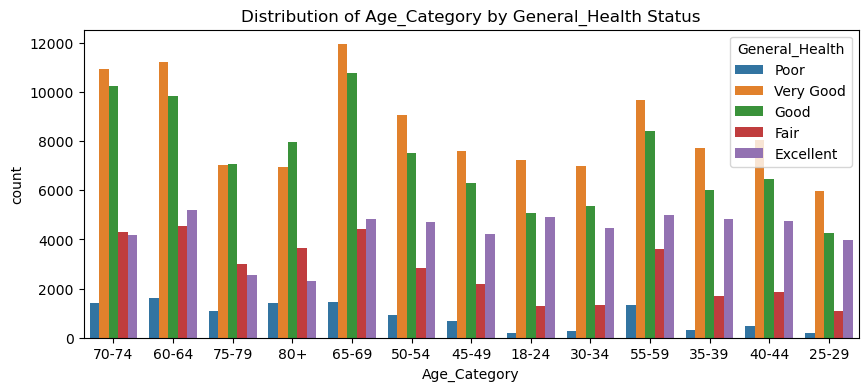

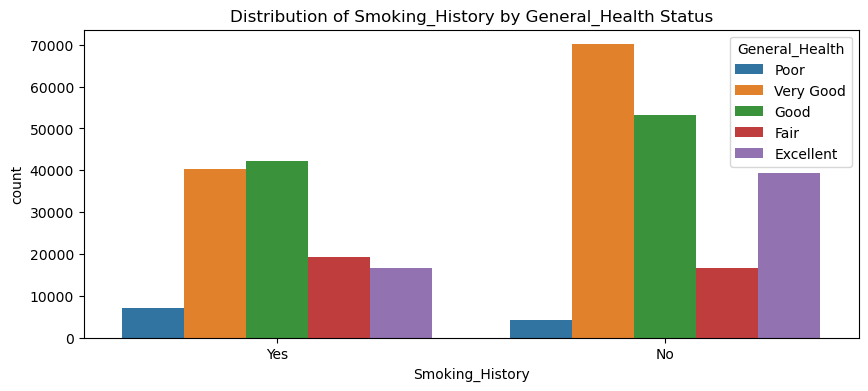

In [9]:
# Count plots for categorical variables
categorical_vars = ['Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression',
                    'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']
for var in categorical_vars:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=var, hue='General_Health', data=df)
    plt.title(f'Distribution of {var} by General_Health Status')
    plt.show()

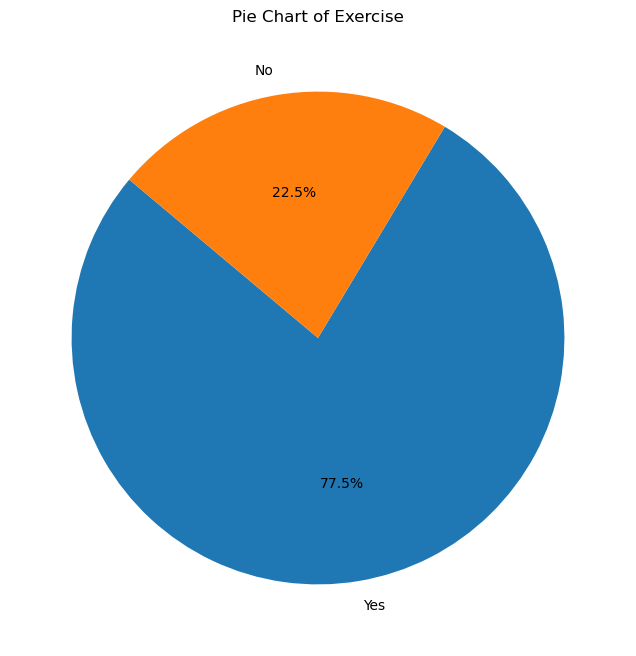

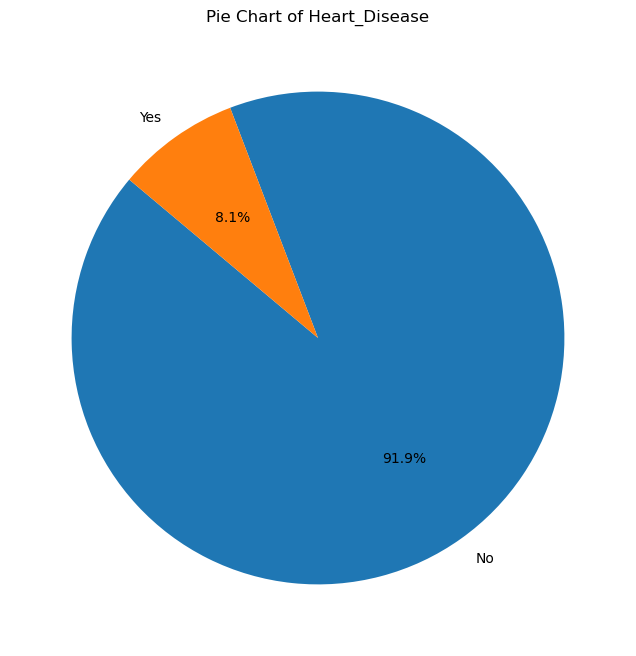

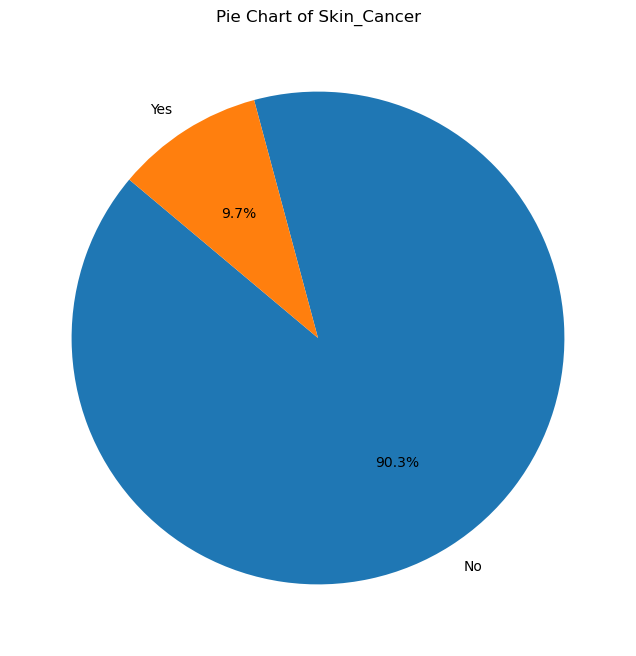

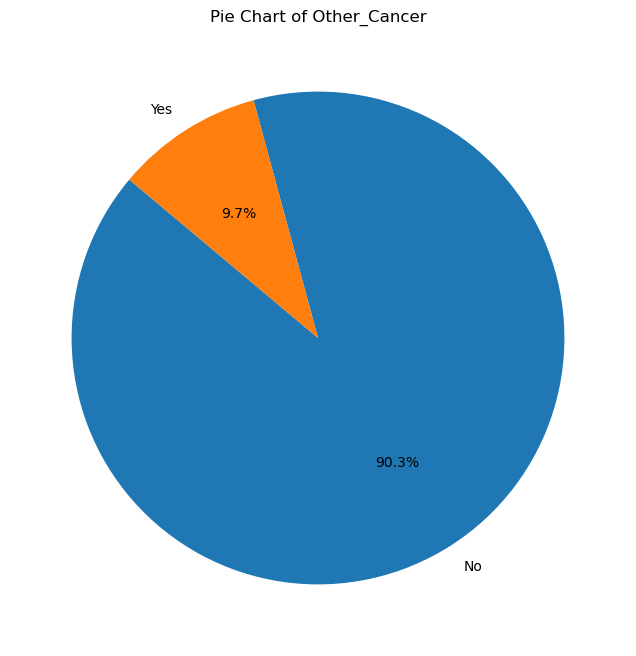

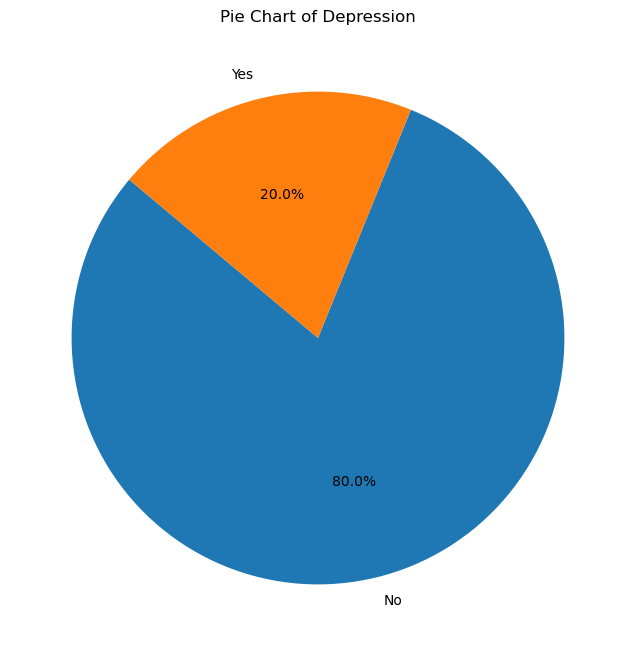

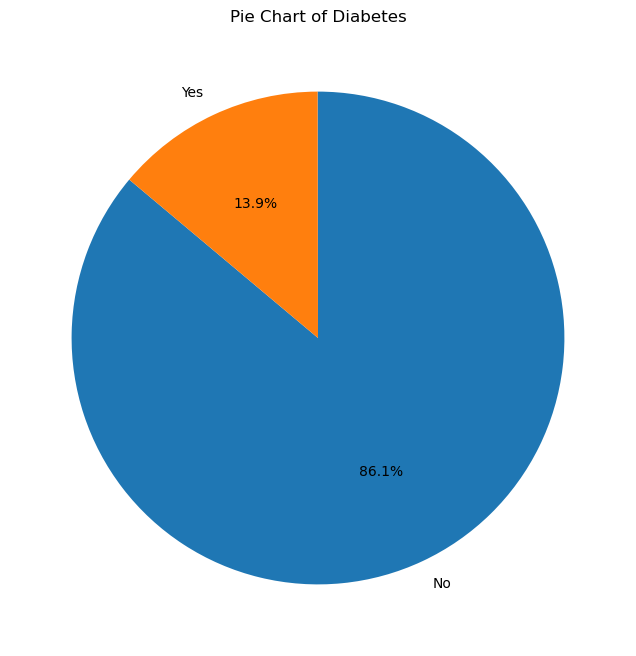

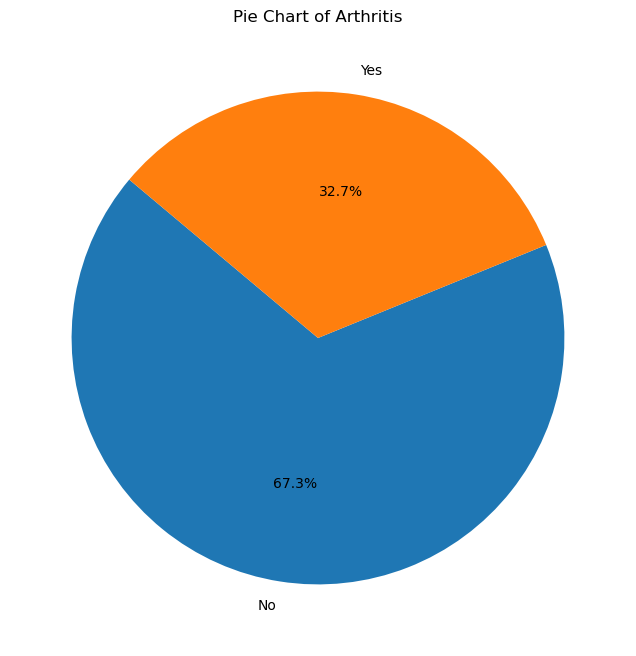

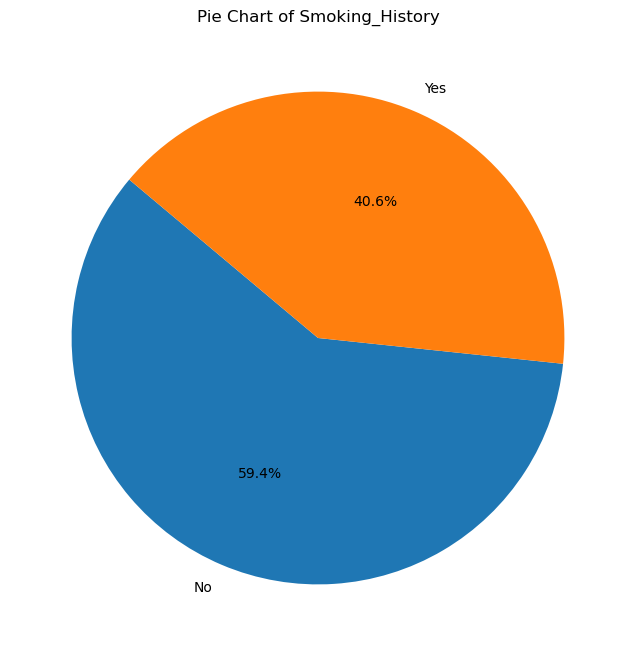

In [10]:
categorical_variable3 = 'Exercise'

# Hitung jumlah masing-masing kategori
category_counts = df[categorical_variable3].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {categorical_variable3}')
plt.show()


categorical_variable4 = 'Heart_Disease'

# Hitung jumlah masing-masing kategori
category_counts = df[categorical_variable4].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {categorical_variable4}')
plt.show()


categorical_variable5 = 'Skin_Cancer'

# Hitung jumlah masing-masing kategori
category_counts = df[categorical_variable5].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {categorical_variable5}')
plt.show()


categorical_variable6 = 'Other_Cancer'

# Hitung jumlah masing-masing kategori
category_counts = df[categorical_variable6].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {categorical_variable6}')
plt.show()


categorical_variable7 = 'Depression'

# Hitung jumlah masing-masing kategori
category_counts = df[categorical_variable7].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {categorical_variable7}')
plt.show()


categorical_variable8 = 'Diabetes'

# Hitung jumlah masing-masing kategori
category_counts = df[categorical_variable8].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {categorical_variable8}')
plt.show()


categorical_variable9 = 'Arthritis'

# Hitung jumlah masing-masing kategori
category_counts = df[categorical_variable9].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {categorical_variable9}')
plt.show()


categorical_variable11 = 'Smoking_History'

# Hitung jumlah masing-masing kategori
category_counts = df[categorical_variable11].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {categorical_variable11}')
plt.show()

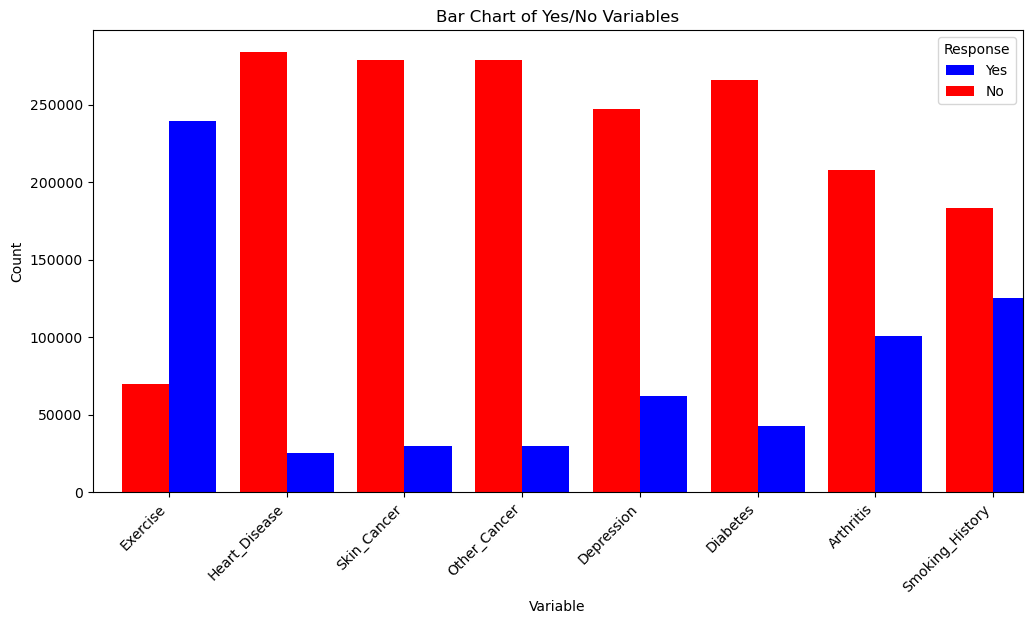

In [11]:
# Pilih variabel yang berisi yes/no
yes_no_variables = ['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Smoking_History']

# Hitung jumlah masing-masing kategori
category_counts = df[yes_no_variables].apply(pd.Series.value_counts)

# Ubah index agar mudah dibaca
category_counts.index = ['No', 'Yes']

# Transpose DataFrame agar lebih mudah untuk plotting
category_counts = category_counts.T

# Buat bar chart
plt.figure(figsize=(12, 6))
category_counts['Yes'].plot(kind='bar', color='blue', label='Yes', position=0, width=0.4)
category_counts['No'].plot(kind='bar', color='red', label='No', position=1, width=0.4)
plt.xlabel('Variable')
plt.ylabel('Count')
plt.title('Bar Chart of Yes/No Variables')
plt.legend(title='Response')
plt.xticks(rotation=45, ha='right')
plt.show()


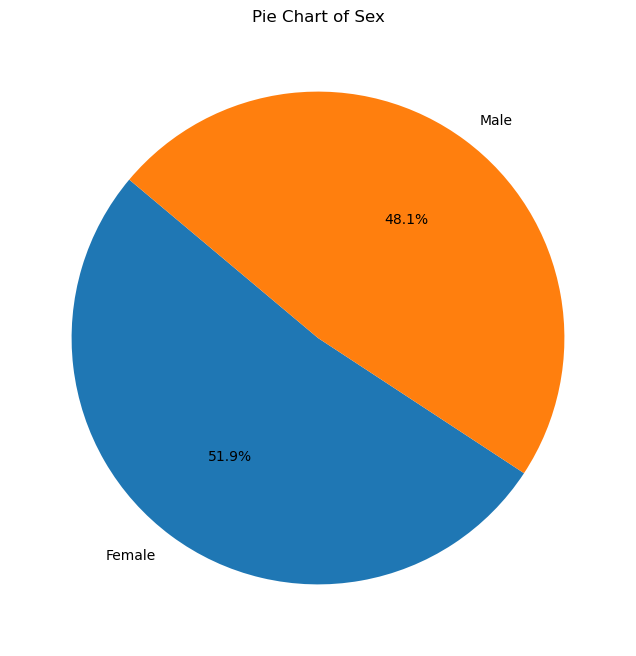

In [12]:
categorical_variable10 = 'Sex'

# Hitung jumlah masing-masing kategori
category_counts = df[categorical_variable10].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {categorical_variable10}')
plt.show()

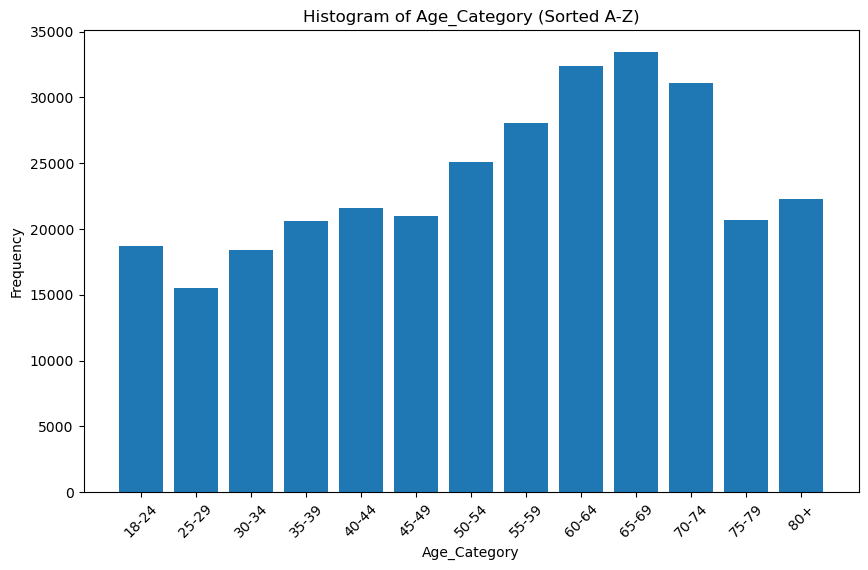

In [13]:
categorical_variable12 = 'Age_Category'

# Hitung jumlah masing-masing kategori
category_counts = df[categorical_variable12].value_counts()

# Urutkan berdasarkan indeks (kategori) dari A-Z
category_counts_sorted = category_counts.sort_index()

# Buat bar chart
plt.figure(figsize=(10, 6))
plt.bar(category_counts_sorted.index, category_counts_sorted.values)
plt.xlabel(categorical_variable12)
plt.ylabel('Frequency')
plt.title(f'Histogram of {categorical_variable12} (Sorted A-Z)')
plt.xticks(rotation=45)
plt.show()

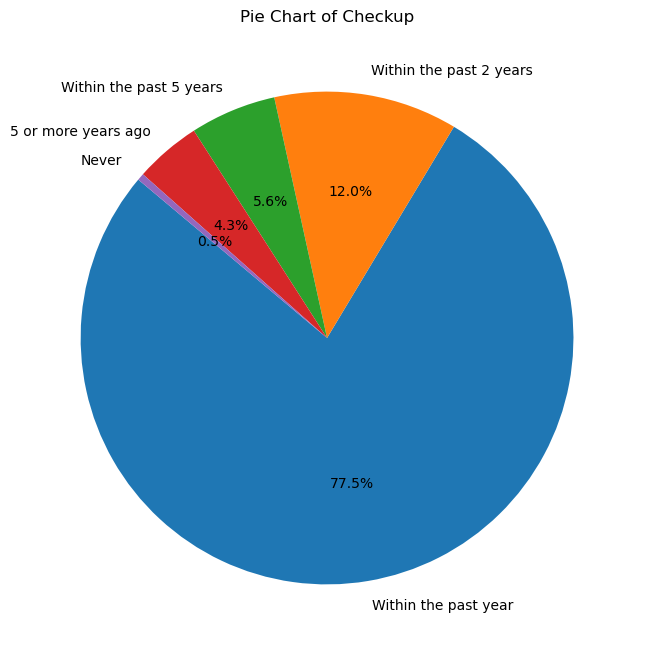

In [14]:
categorical_variable2 = 'Checkup'

# Hitung jumlah masing-masing kategori
category_counts = df[categorical_variable2].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {categorical_variable2}')
plt.show()

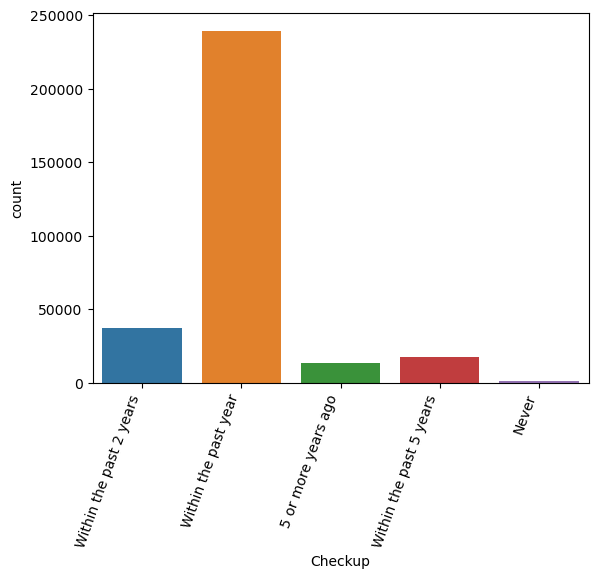

In [15]:
sns.countplot(x = df.Checkup)
plt.xticks(rotation=70, ha='right')
plt.show()

In [16]:
df['Checkup'].value_counts()

Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: Checkup, dtype: int64

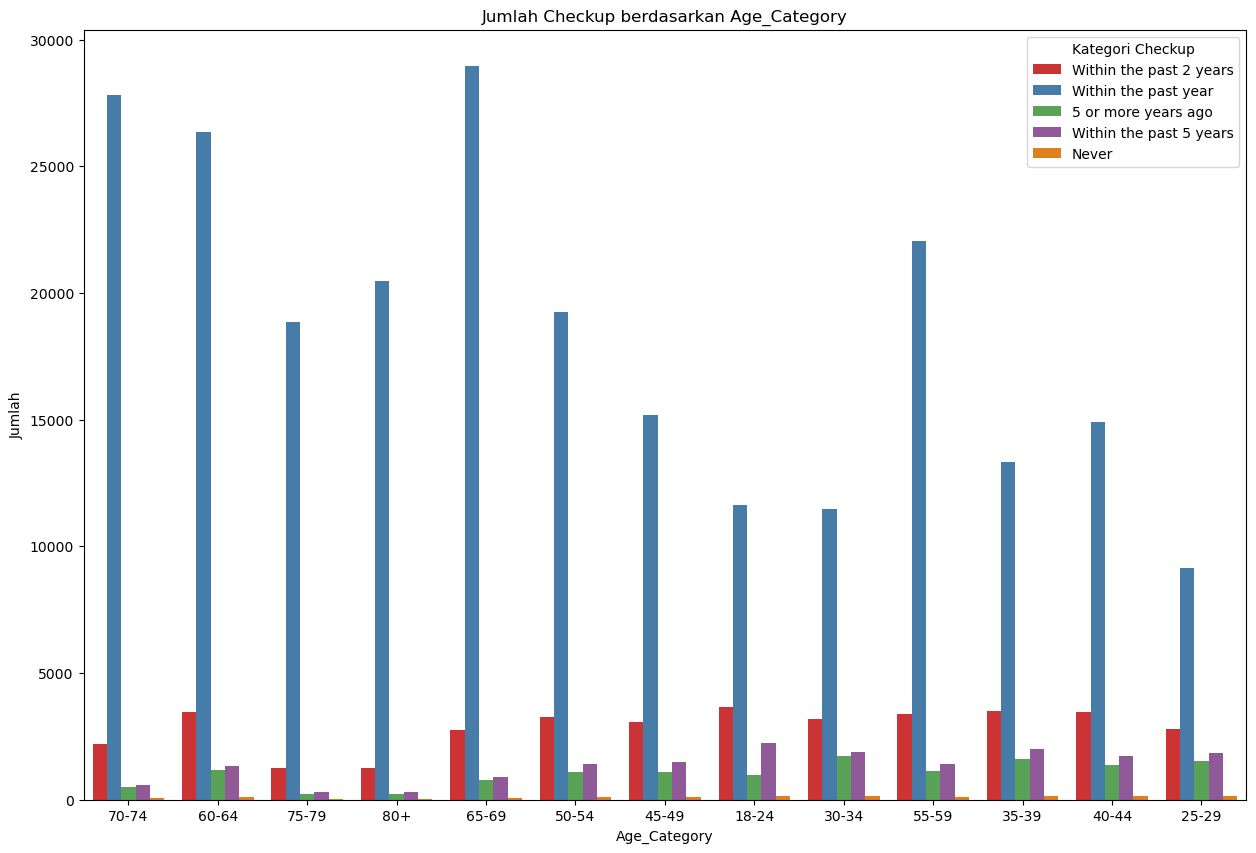

In [17]:
# Plot countplot
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='Age_Category', hue='Checkup', palette='Set1')
plt.title('Jumlah Checkup berdasarkan Age_Category')
plt.xlabel('Age_Category')
plt.ylabel('Jumlah')
plt.legend(title='Kategori Checkup')
plt.show()

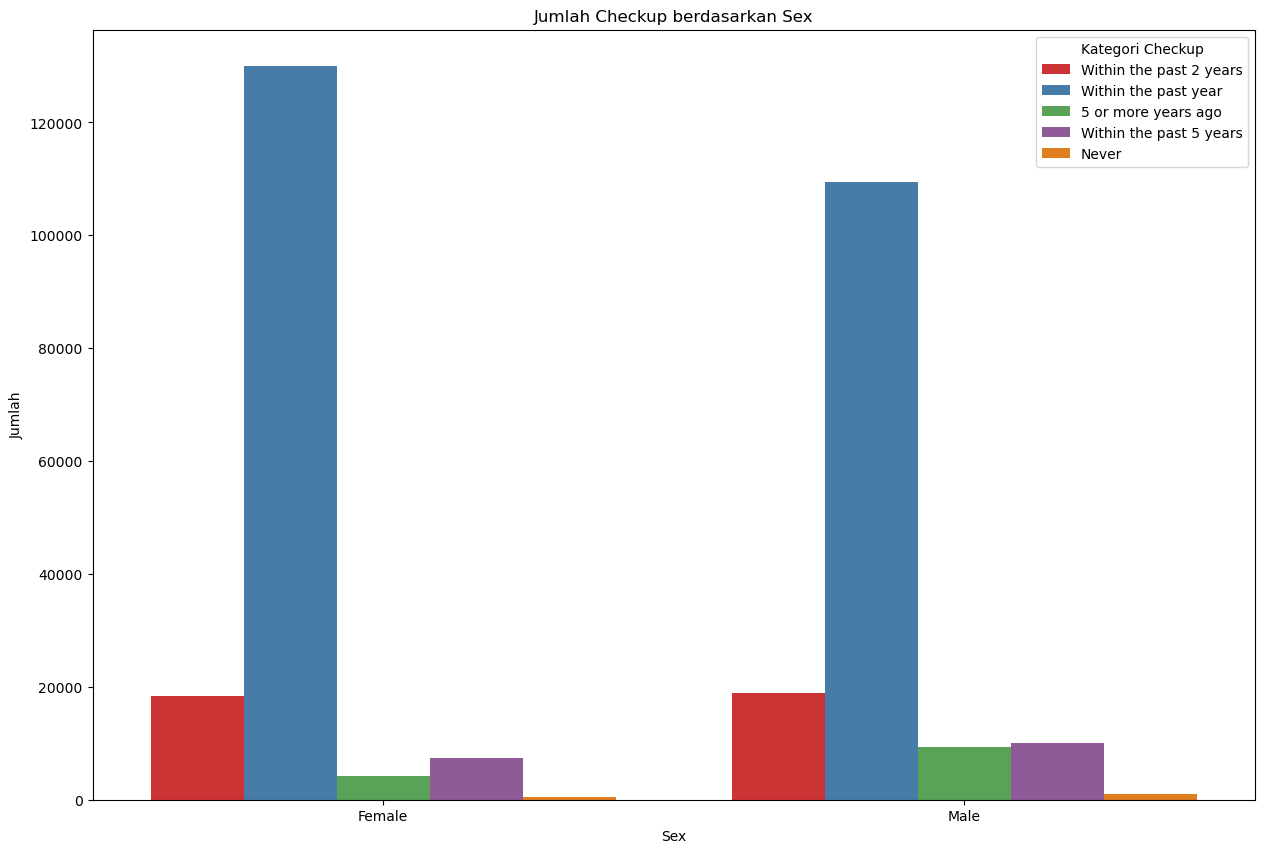

In [18]:
# Plot countplot
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='Sex', hue='Checkup', palette='Set1')
plt.title('Jumlah Checkup berdasarkan Sex')
plt.xlabel('Sex')
plt.ylabel('Jumlah')
plt.legend(title='Kategori Checkup')
plt.show()

# Preprocessing Data

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [20]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


### Check Missing Value

In [21]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [22]:
df.General_Health.unique()

array(['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], dtype=object)

### Check Duplicated Data

In [23]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
308849    False
308850    False
308851    False
308852    False
308853    False
Length: 308854, dtype: bool

In [24]:
df.duplicated().sum()

83

In [25]:
df = df.drop_duplicates()
df.duplicated().sum()

0

### Cek Outlier

<Axes: >

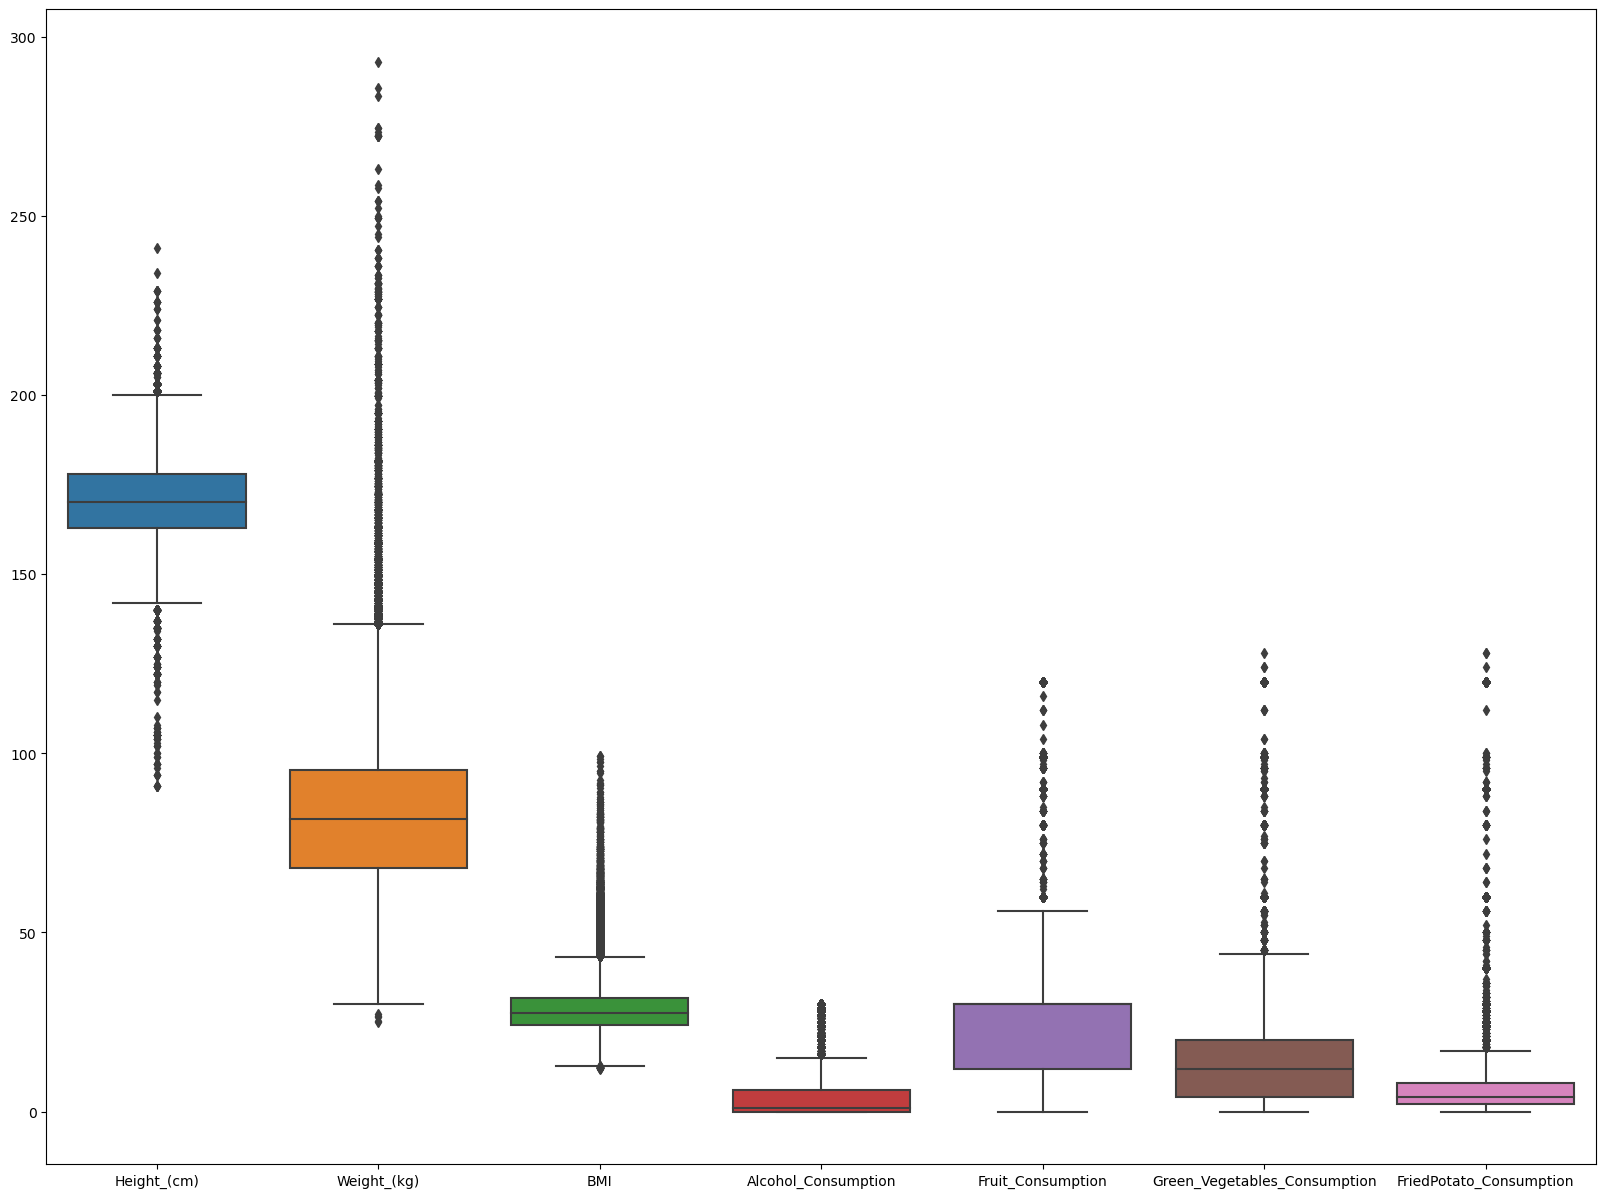

In [26]:
#cek outlier dengan boxplot
plt.figure(figsize=(20,15))
sns.boxplot(data=df)

### Data Cleansing

In [27]:
# Menghapus variabel Age_Category
df = df.drop(['Checkup','Age_Category'], axis=1)

# Menampilkan DataFrame setelah variabel dihapus
df

,General_Health,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,No,No,No,No,No,No,Yes,Female,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,No,Yes,No,No,No,Yes,No,Female,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Yes,No,No,No,No,Yes,No,Female,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Yes,Yes,No,No,No,Yes,No,Male,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,No,No,No,No,No,No,No,Male,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Yes,No,No,No,No,No,No,Male,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Yes,No,No,No,No,Yes,No,Male,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,Yes,No,No,No,Yes,Yes,No,Female,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Yes,No,No,No,No,No,No,Male,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [28]:
# Melakukan penggantian nilai pada kolom Diabetes
df['General_Health'] = df['General_Health'].replace('Excellent', 'Good').replace('Very Good', 'Good')
df

,General_Health,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,No,No,No,No,No,No,Yes,Female,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Good,No,Yes,No,No,No,Yes,No,Female,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Good,Yes,No,No,No,No,Yes,No,Female,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Yes,Yes,No,No,No,Yes,No,Male,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,No,No,No,No,No,No,No,Male,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Good,Yes,No,No,No,No,No,No,Male,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Yes,No,No,No,No,Yes,No,Male,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Good,Yes,No,No,No,Yes,Yes,No,Female,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Good,Yes,No,No,No,No,No,No,Male,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [29]:
df['General_Health'].value_counts()

Good    261632
Fair     35808
Poor     11331
Name: General_Health, dtype: int64

In [30]:
# Membuat variabel Cancer berdasarkan variabel Skin_Cancer dan Other_Cancer
df['Cancer'] = df['Skin_Cancer'].replace({'Yes': 1, 'No': 0}) + df['Other_Cancer'].replace({'Yes': 1, 'No': 0})

# Menghapus variabel Skin_Cancer dan Other_Cancer
df.drop(['Skin_Cancer', 'Other_Cancer'], axis=1, inplace=True)

# Menampilkan DataFrame setelah perubahan
df

,General_Health,Exercise,Heart_Disease,Depression,Diabetes,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Cancer
0,Poor,No,No,No,No,Yes,Female,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0,0
1,Good,No,Yes,No,Yes,No,Female,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0,0
2,Good,Yes,No,No,Yes,No,Female,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0,0
3,Poor,Yes,Yes,No,Yes,No,Male,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0,0
4,Good,No,No,No,No,No,Male,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Good,Yes,No,No,No,No,Male,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0,0
308850,Fair,Yes,No,No,Yes,No,Male,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0,0
308851,Good,Yes,No,Yes,Yes,No,Female,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0,0
308852,Good,Yes,No,No,No,No,Male,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308771 entries, 0 to 308853
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308771 non-null  object 
 1   Exercise                      308771 non-null  object 
 2   Heart_Disease                 308771 non-null  object 
 3   Depression                    308771 non-null  object 
 4   Diabetes                      308771 non-null  object 
 5   Arthritis                     308771 non-null  object 
 6   Sex                           308771 non-null  object 
 7   Height_(cm)                   308771 non-null  float64
 8   Weight_(kg)                   308771 non-null  float64
 9   BMI                           308771 non-null  float64
 10  Smoking_History               308771 non-null  object 
 11  Alcohol_Consumption           308771 non-null  float64
 12  Fruit_Consumption             308771 non-nul

In [32]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Cancer
count,308771.000000,308771.000000,308771.000000,308771.000000,308771.000000,308771.000000,308771.000000,308771.000000
mean,170.615297,83.590514,28.626828,5.097606,29.834191,15.109431,6.297259,0.193895
std,10.658466,21.344691,6.522826,8.200459,24.877874,14.926935,8.583870,0.448886
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000,0.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000,0.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000,0.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000,2.000000


In [33]:
df.columns

Index(['General_Health', 'Exercise', 'Heart_Disease', 'Depression', 'Diabetes',
       'Arthritis', 'Sex', 'Height_(cm)', 'Weight_(kg)', 'BMI',
       'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Cancer'],
      dtype='object')

# One Hot Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding untuk setiap variabel non-numerik
non_numeric_variables = ['General_Health', 'Exercise', 'Heart_Disease',
                         'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Smoking_History']
for var in non_numeric_variables:
    df[var] = label_encoder.fit_transform(df[var])

# Menampilkan DataFrame setelah label encoding
df

,General_Health,Exercise,Heart_Disease,Depression,Diabetes,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Cancer
0,2,0,0,0,0,1,0,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0,0
1,1,0,1,0,1,0,0,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0,0
2,1,1,0,0,1,0,0,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0,0
3,2,1,1,0,1,0,1,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0,0
4,1,0,0,0,0,0,1,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,1,1,0,0,0,0,1,168.0,81.65,29.05,0,4.0,30.0,8.0,0.0,0
308850,0,1,0,0,1,0,1,180.0,69.85,21.48,0,8.0,15.0,60.0,4.0,0
308851,1,1,0,1,1,0,0,157.0,61.23,24.69,1,4.0,40.0,8.0,4.0,0
308852,1,1,0,0,0,0,1,183.0,79.38,23.73,0,3.0,30.0,12.0,0.0,0


# Feature Selection

In [35]:
#feature selection data and split data
X = df.drop(columns='General_Health')
y = df.General_Health

In [36]:
X

,Exercise,Heart_Disease,Depression,Diabetes,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Cancer
0,0,0,0,0,1,0,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0,0
1,0,1,0,1,0,0,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0,0
2,1,0,0,1,0,0,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0,0
3,1,1,0,1,0,1,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0,0
4,0,0,0,0,0,1,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,1,0,0,0,0,1,168.0,81.65,29.05,0,4.0,30.0,8.0,0.0,0
308850,1,0,0,1,0,1,180.0,69.85,21.48,0,8.0,15.0,60.0,4.0,0
308851,1,0,1,1,0,0,157.0,61.23,24.69,1,4.0,40.0,8.0,4.0,0
308852,1,0,0,0,0,1,183.0,79.38,23.73,0,3.0,30.0,12.0,0.0,0


In [37]:
y

0         2
1         1
2         1
3         2
4         1
         ..
308849    1
308850    0
308851    1
308852    1
308853    1
Name: General_Health, Length: 308771, dtype: int32

# Feature Scalling

In [38]:
# Daftar variabel yang akan dilakukan penskalaan
variables_to_scale = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption',
                      'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

# Membuat objek
scaler = RobustScaler()

# Melakukan penskalaan untuk setiap variabel
df[variables_to_scale] = scaler.fit_transform(df[variables_to_scale])
df

,General_Health,Exercise,Heart_Disease,Depression,Diabetes,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Cancer
0,2,0,0,0,0,1,0,-1.333333,-1.800441,-1.688482,1,-0.166667,0.000000,0.2500,1.333333,0
1,1,0,1,0,1,0,0,-0.333333,-0.166850,0.111257,0,-0.166667,0.000000,-0.7500,0.000000,0
2,1,1,0,0,1,0,0,-0.466667,0.249908,0.789267,0,0.500000,-1.000000,-0.5625,2.000000,0
3,2,1,1,0,1,0,1,0.666667,0.433297,0.168848,0,-0.166667,0.000000,1.1250,0.666667,0
4,1,0,0,0,0,0,1,1.400000,0.249908,-0.401832,1,-0.166667,-1.222222,-0.5000,-0.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,1,1,0,0,0,0,1,-0.133333,0.000000,0.210733,0,0.500000,0.000000,-0.2500,-0.666667,0
308850,0,1,0,0,1,0,1,0.666667,-0.433664,-0.780105,0,1.166667,-0.833333,3.0000,0.000000,0
308851,1,1,0,1,1,0,0,-0.866667,-0.750459,-0.359948,1,0.500000,0.555556,-0.2500,0.000000,0
308852,1,1,0,0,0,0,1,0.866667,-0.083425,-0.485602,0,0.333333,0.000000,0.0000,-0.666667,0


<Axes: >

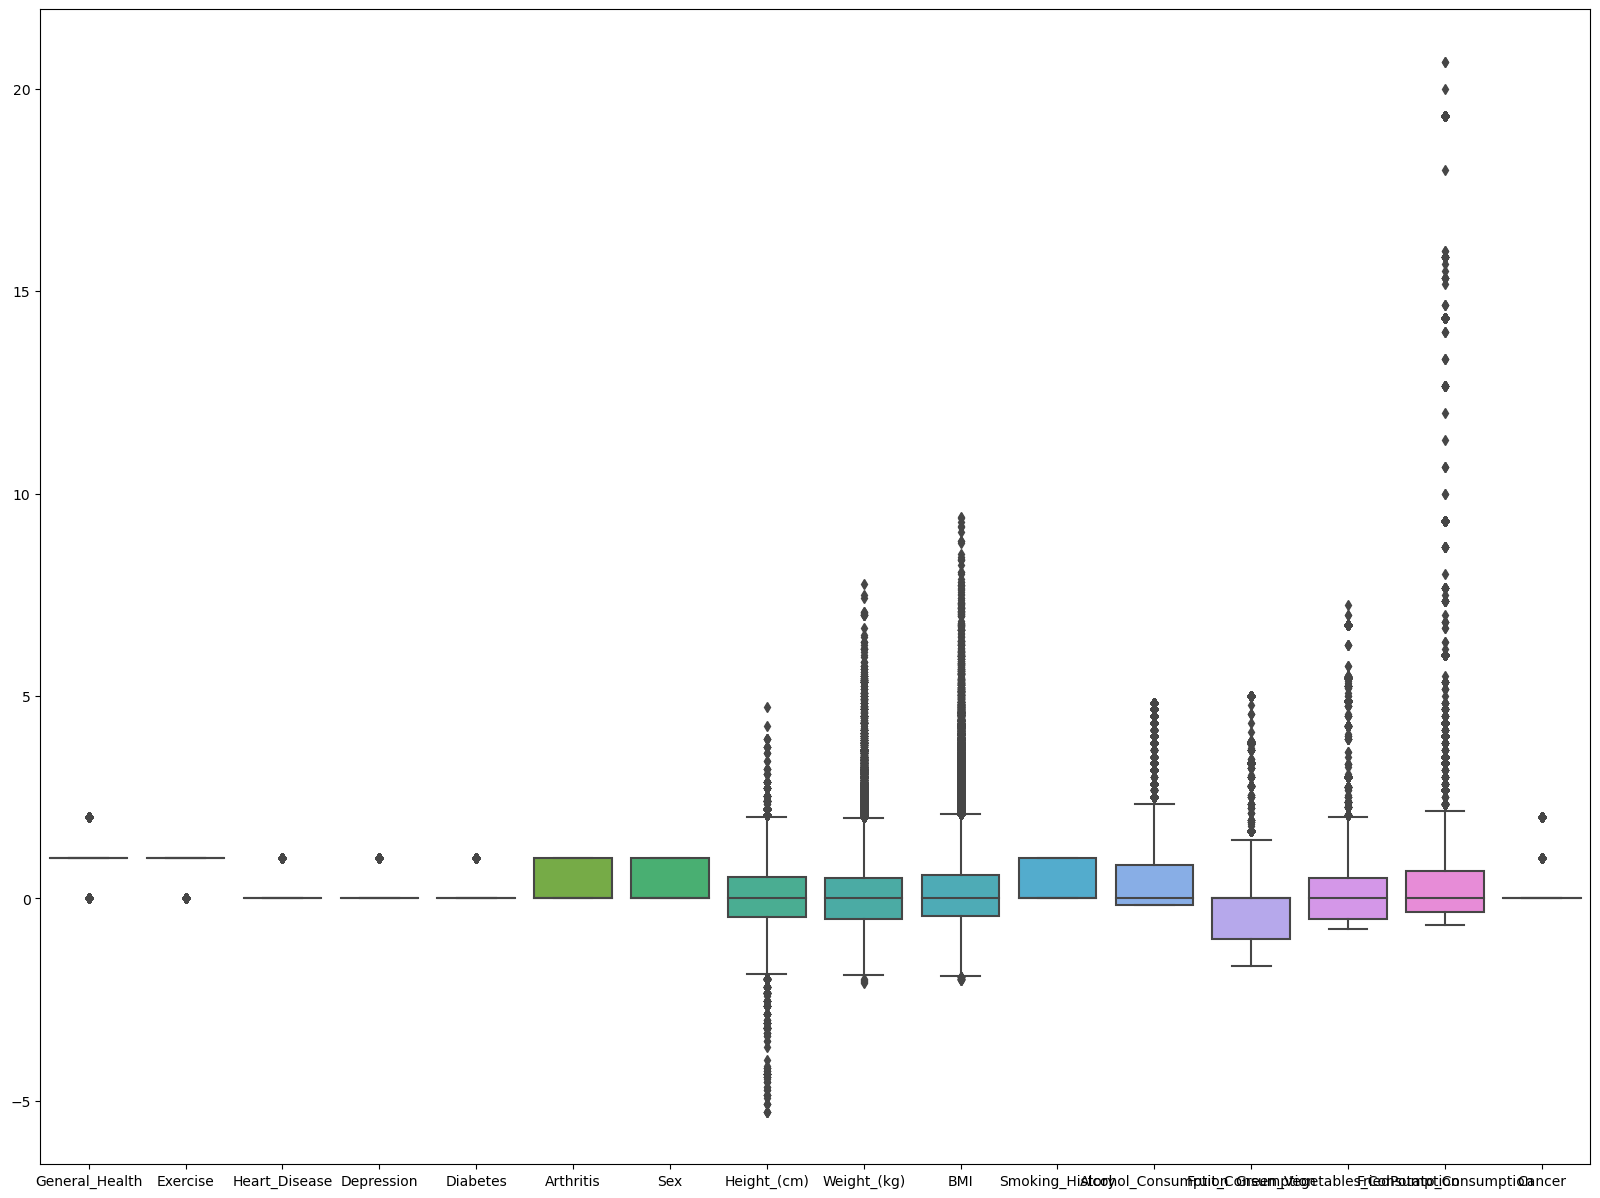

In [39]:
#cek boxplot
plt.figure(figsize=(20,15))
sns.boxplot(data=df)

# Clustering

In [40]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [41]:
df_new = df[["BMI", "Green_Vegetables_Consumption"]]

# Menampilkan DataFrame baru
df_new

,BMI,Green_Vegetables_Consumption
0,-1.688482,0.2500
1,0.111257,-0.7500
2,0.789267,-0.5625
3,0.168848,1.1250
4,-0.401832,-0.5000
...,...,...
308849,0.210733,-0.2500
308850,-0.780105,3.0000
308851,-0.359948,-0.2500
308852,-0.485602,0.0000


In [42]:
e=np.asarray(df_new)
print(e)

[[-1.68848168  0.25      ]
 [ 0.11125654 -0.75      ]
 [ 0.78926702 -0.5625    ]
 ...
 [-0.35994764 -0.25      ]
 [-0.48560209  0.        ]
 [ 0.55890052  0.        ]]


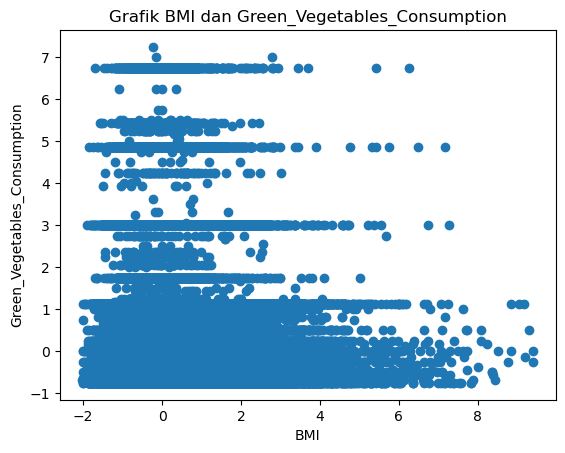

In [43]:
plt.scatter(e[:,0],e[:,1],label='True Position')
plt.xlabel('BMI')
plt.ylabel('Green_Vegetables_Consumption')
plt.title('Grafik BMI dan Green_Vegetables_Consumption')
plt.show()

Text(0.5, 0, 'n_clusters')

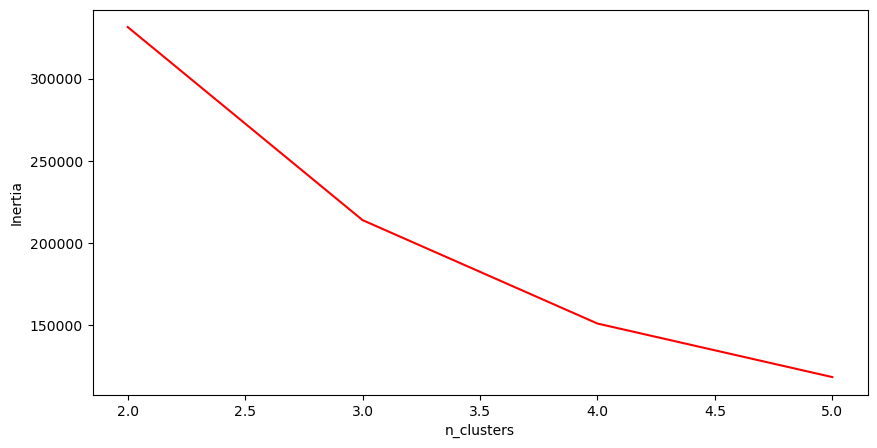

In [44]:
# Mententukan jumlah k cluster dengan Elbow Analysis
ScoreElbow = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k)
    label = kmeans.fit_predict(e)
    
    ScoreElbow.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(2, 6), ScoreElbow, 'r-')
plt.ylabel('Inertia')
plt.xlabel('n_clusters')

In [45]:
from sklearn.metrics import silhouette_score
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
pred_y=kmeans.fit_predict(df_new)
df['Cluster']=pred_y
df

,General_Health,Exercise,Heart_Disease,Depression,Diabetes,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Cancer,Cluster
0,2,0,0,0,0,1,0,-1.333333,-1.800441,-1.688482,1,-0.166667,0.000000,0.2500,1.333333,0,1
1,1,0,1,0,1,0,0,-0.333333,-0.166850,0.111257,0,-0.166667,0.000000,-0.7500,0.000000,0,1
2,1,1,0,0,1,0,0,-0.466667,0.249908,0.789267,0,0.500000,-1.000000,-0.5625,2.000000,0,0
3,2,1,1,0,1,0,1,0.666667,0.433297,0.168848,0,-0.166667,0.000000,1.1250,0.666667,0,2
4,1,0,0,0,0,0,1,1.400000,0.249908,-0.401832,1,-0.166667,-1.222222,-0.5000,-0.666667,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,1,1,0,0,0,0,1,-0.133333,0.000000,0.210733,0,0.500000,0.000000,-0.2500,-0.666667,0,1
308850,0,1,0,0,1,0,1,0.666667,-0.433664,-0.780105,0,1.166667,-0.833333,3.0000,0.000000,0,2
308851,1,1,0,1,1,0,0,-0.866667,-0.750459,-0.359948,1,0.500000,0.555556,-0.2500,0.000000,0,1
308852,1,1,0,0,0,0,1,0.866667,-0.083425,-0.485602,0,0.333333,0.000000,0.0000,-0.666667,0,1


In [46]:
df['Cluster'].value_counts()

1    173235
0     69588
2     65948
Name: Cluster, dtype: int64

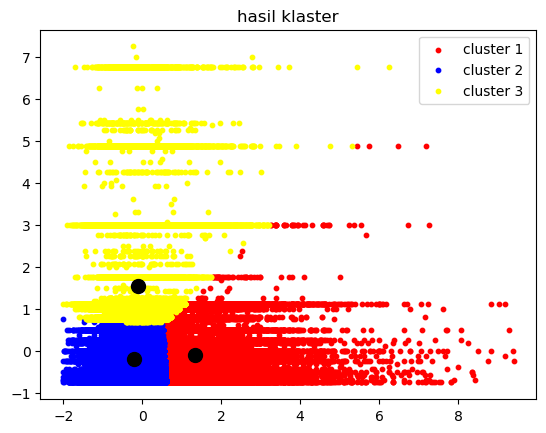

In [47]:
plt.scatter(e[pred_y==0,0],e[pred_y==0,1],
            s=10,c='red',label='cluster 1')
plt.scatter(e[pred_y==1,0],e[pred_y==1,1],
            s=10,c='blue',label='cluster 2')
plt.scatter(e[pred_y==2,0],e[pred_y==2,1],
            s=10,c='yellow',label='cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1], s=100, c="black")
plt.title("hasil klaster")
plt.legend()
plt.show()

In [50]:
from sklearn.metrics import silhouette_score
print(f'Silhouette Score: {silhouette_score(e, pred_y)}')

Silhouette Score: 0.4272546522681764
